In [ ]:
import numpy as np
from tqdm import tqdm

vectors = {}
with open('glove.6B/glove.6B.300d.txt') as f:
    for line in tqdm(f, total=400000):
        word, vector = line.split(maxsplit=1)
        v = np.fromstring(vector, sep=' ', dtype='float32')
        vectors[word] = v / np.linalg.norm(v)

In [154]:
vectors['kitten']

array([-0.03189607,  0.00502735, -0.03142706, -0.09080496, -0.01372096,
       -0.00790456,  0.030317  , -0.07247453, -0.04573111,  0.05332294,
        0.07288674, -0.08122185,  0.00484673, -0.01537791,  0.06188687,
        0.03534793, -0.04661558, -0.01694448, -0.04042754,  0.00050012,
        0.03243811,  0.11682782, -0.02655192,  0.06118741, -0.07047677,
       -0.0037469 ,  0.02992264,  0.03477181,  0.02501019,  0.01804155,
       -0.05208955, -0.09751231, -0.03454461, -0.04255676,  0.07700237,
        0.04495537, -0.05921724,  0.01425699,  0.00727082,  0.08407649,
        0.00414386,  0.0257486 ,  0.0416804 , -0.09127396, -0.06493788,
       -0.01052713,  0.11504428, -0.04301928, -0.04149053, -0.01986242,
       -0.05381305, -0.05122618,  0.00951202,  0.07270174,  0.015696  ,
       -0.00185138, -0.02895541,  0.10035073, -0.01022527, -0.03901888,
       -0.0286357 , -0.00038816, -0.06632058,  0.00219413,  0.04281642,
       -0.10785005,  0.11508809, -0.01601003, -0.01545094, -0.02

In [155]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams["figure.figsize"] = (18, 10)

def plot_words(*words, lines=False):
    pca = PCA(n_components=2)
    xys = pca.fit_transform([vectors[w] for w in words])

    if lines:
        for i in range(0, len(words), 2):
            plt.plot(xys[i:i+2, 0], xys[i:i+2, 1])
    else:
        plt.scatter(*xys.T)
        
    for word, xy in zip(words, xys):
        plt.annotate(word, xy, fontsize=20)

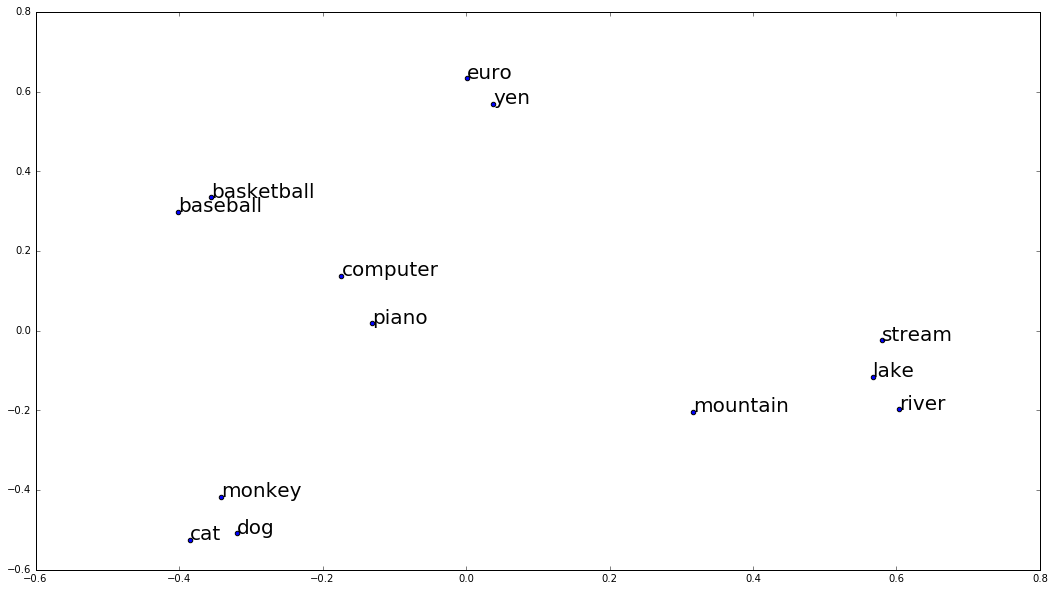

In [157]:
plot_words('baseball', 'basketball', 'mountain', 'lake', 'river', 'stream', 'euro', 'yen',
           'monkey', 'dog', 'cat', 'computer', 'piano')

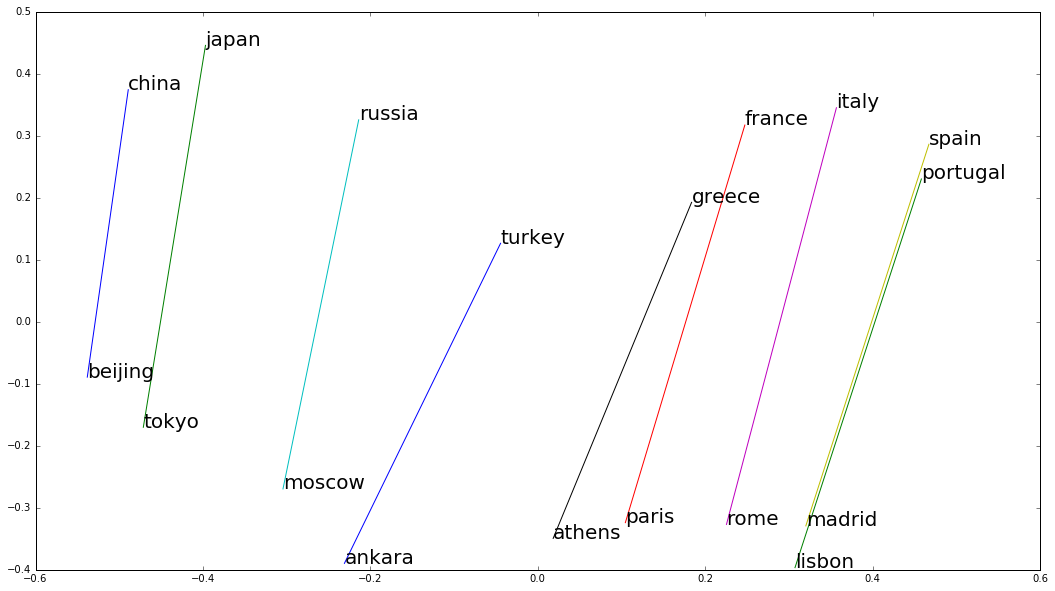

In [159]:
plot_words('china', 'beijing',
           'japan', 'tokyo',
           'france', 'paris',
           'russia', 'moscow',
           'italy', 'rome',
           'spain', 'madrid',
           'greece', 'athens',
           'turkey', 'ankara',
           'portugal', 'lisbon', lines=True)

In [160]:
import heapq

def most_similar(v, *ignore, N=1):
    similar = []
    for word, u in vectors.items():
        if word in ignore: continue
        similarity = u.dot(v)
        if len(similar) < N:
            heapq.heappush(similar, (similarity, word))
        else:
            heapq.heappushpop(similar, (similarity, word))
    return sorted(similar, reverse=True)

In [167]:
most_similar(vectors['puppy'], 'puppy', N=10)

[(0.71447271, 'puppies'),
 (0.59360611, 'dog'),
 (0.58095807, 'retriever'),
 (0.55985683, 'kitten'),
 (0.50823659, 'kittens'),
 (0.49935153, 'rottweiler'),
 (0.48627377, 'pet'),
 (0.47835144, 'dogs'),
 (0.4745881, 'skinny'),
 (0.47365835, 'adorable')]

In [162]:
most_similar(vectors['paris'] - vectors['france'] + vectors['poland'])

[(0.85991102, 'warsaw')]

In [163]:
most_similar(vectors['queen'] - vectors['woman'] + vectors['man'], 'queen')

[(0.74458629, 'king')]

In [164]:
most_similar(vectors['kitten'] - vectors['cat'] + vectors['dog'], 'kitten')

[(0.73260075, 'puppy')]